<a href="https://colab.research.google.com/github/avinash2203/MNIST-Fashion-Example/blob/master/MNIST_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

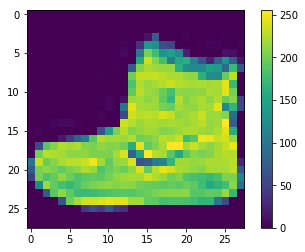

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [0]:
train_images = train_images/255.0
test_images = test_images/255.0

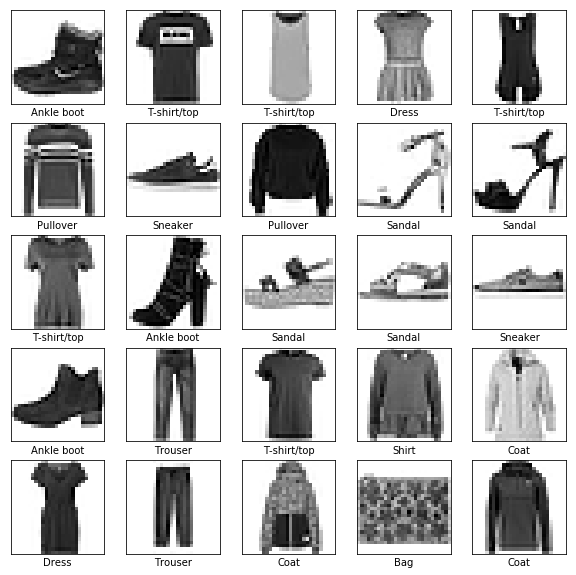

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4968 - acc: 0.8261
Epoch 2/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3725 - acc: 0.8643
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3350 - acc: 0.8780
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3113 - acc: 0.8854
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2943 - acc: 0.8914
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2795 - acc: 0.8970
Epoch 7/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2664 - acc: 0.9010
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2565 - acc: 0.9035
Epoch 9/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2463 - acc: 0.9071
Epoch 10/10
60000/60000 [==============================] - 4s 65us/sample - loss: 

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3286 - acc: 0.8830

Test accuracy: 0.883


In [0]:
predictions = model.predict(test_images)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

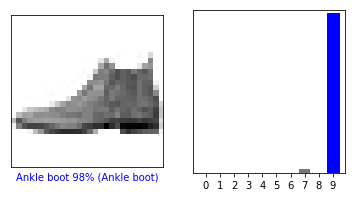

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

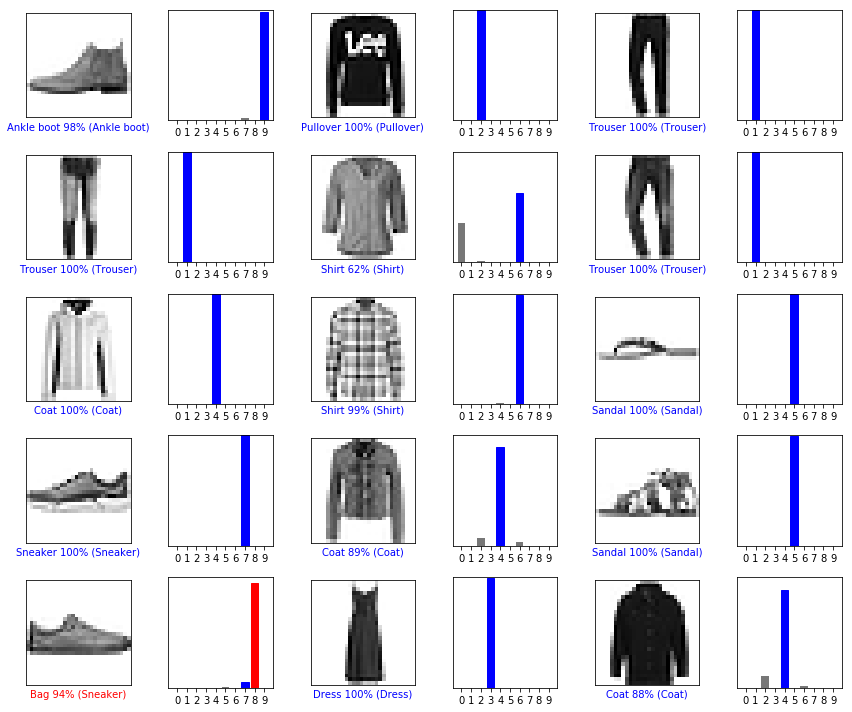

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()